# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

In [2]:
iris = pd.read_csv('/13.iris.csv',index_col=0)

In [3]:
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [4]:
# applying lable encoder to species column
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [5]:
# seprating x and y(class) variables 
x=iris.iloc[:,0:4]
y=iris['Species']

In [6]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [7]:
y.tail()

146    2
147    2
148    2
149    2
150    2
Name: Species, dtype: int32

In [8]:
# to check unique values in specified column
iris['Species'].unique()

array([0, 1, 2])

In [9]:
# to count total values for distinct/unique value
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
# to list name of columns
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [12]:
print([len(y_train)],[len(x_test)])

[120] [30]


# C5.0

### Building Decision Tree Classifier using Entropy Criteria

In [13]:
#applying DT classifier with criteria and depth on train models
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3) # criterion can be GINI for CART
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

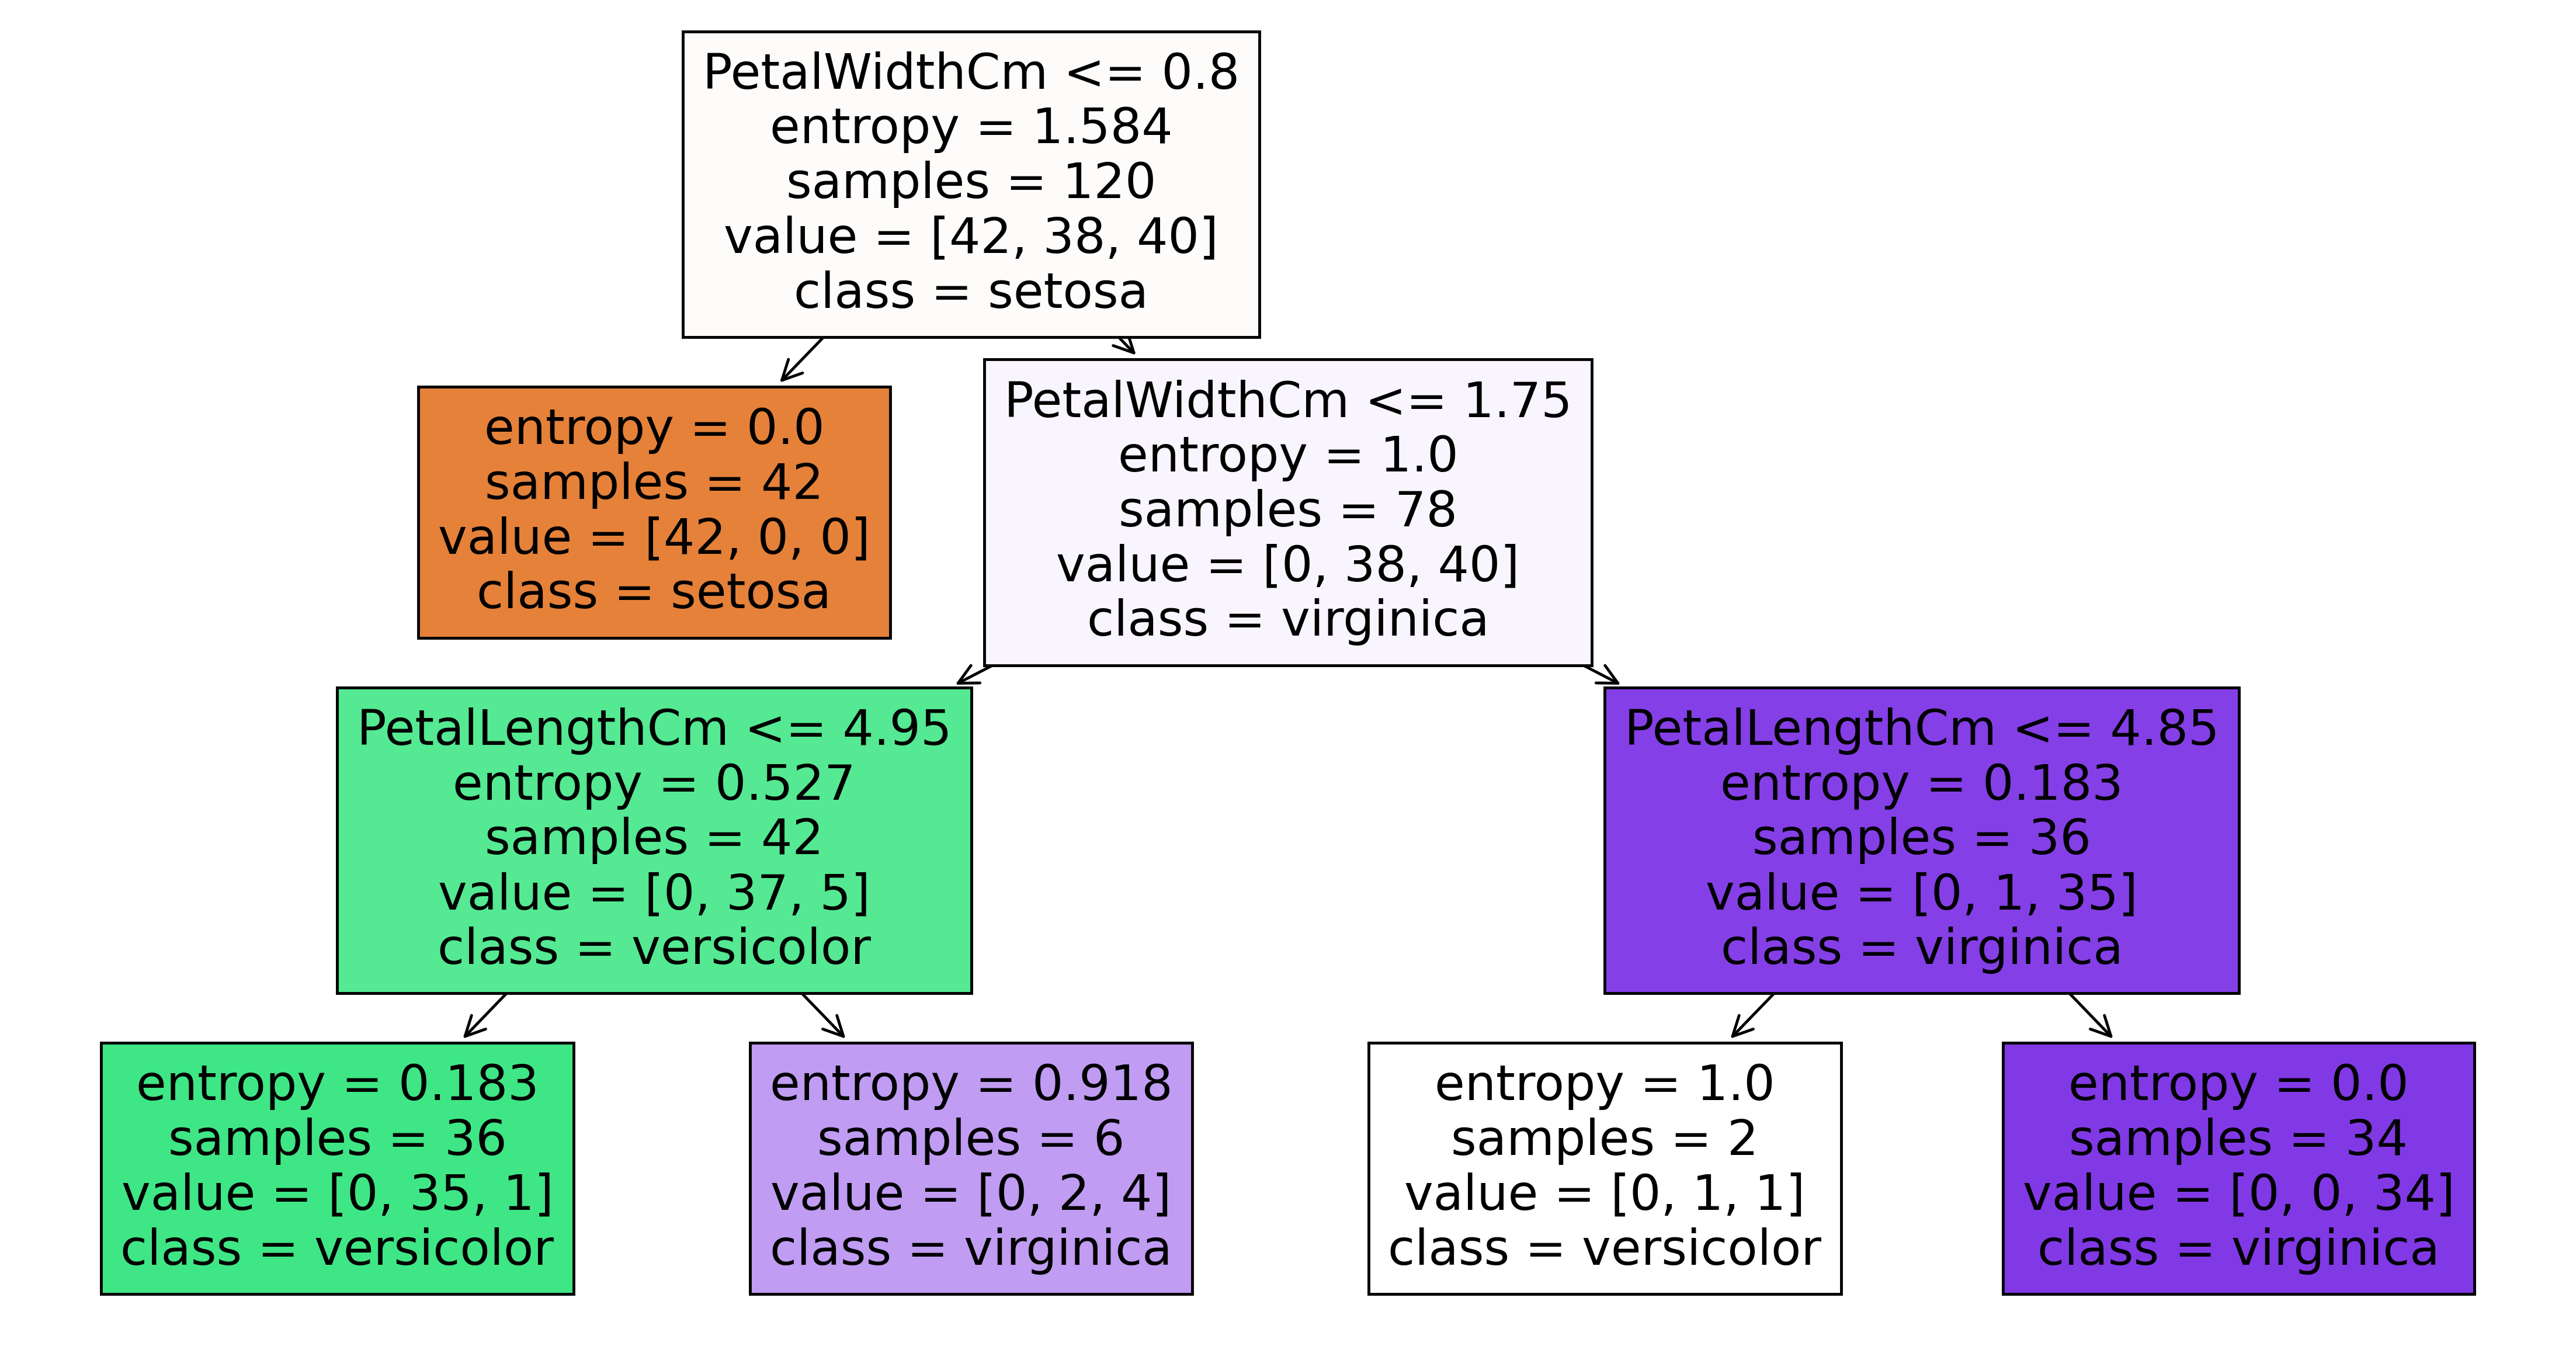

In [14]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8.5), dpi=350)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled =True);

In [15]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [16]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [17]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [18]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

In [19]:
y_test[127:]

Series([], Name: Species, dtype: int32)

# CART

### Building Decision Tree Classifier using Gini Criteria

In [20]:
#applying DT classifier with criteria and depth on train models
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

Decision Tree Regression Example

In [22]:
array = iris.values
X= array[:,0:3]
Y = array[:,3]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [24]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
#Find the accuracy
model.score(X_test,y_test)

0.8566754712450475